<a href="https://colab.research.google.com/github/sajalsaini/ProbabilityDistributions-ai1-fall2019/blob/master/elections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas, Statistics, And Elections

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn.apionly as sns # conda install seaborn or pip install seaborn

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/usr/local/lib/python3.6/dist-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


### Random Variables

A **random variable** is a mapping from a sample space to the set of real numbers. It assigns a real number to each outcome in the sample space.

For example, consider the event of a coin toss that we have seen before. There are two outcomes in the sample space, a heads and a tails. We can ask the question, whats the probability of a heads or a tails? For an unbiased coin, these are, by symmetry, 1/2 each. The random variable here is the number of heads, and its probability is P(0)=1/2, and P(1)=1/2.

Another random variable is the number of heads in two coin tosses. There, as we have seen before, P(0)=1/4, P(1)=1/2, P(2)=1/4.

Random variables provide the link from events and sample spaces to data, and it is their **probability distribution** that we are interested in.

A random variable is called **discrete** if it has a countable number of values. The technical definition of countable is that there is a 1-1 correspondence with the integers 1,2,3... . The number of heads in 2 coin tosses is a discrete random variable.

#### Bernoulli Random Variables

The **Bernoulli Distribution** represents the distribution for coin flips. Let the random variable X represent such a coin flip, where X=1 is heads, and X=0 is tails. Let us further say that the probability of heads is p (p=0.5 is a fair coin). 

We then say:

$$X \sim Bernoulli(p),$$

which is to be read as **X has distribution Bernoulli(p)**. The **probability distribution function (pdf)** or **probability mass function** associated with the Bernoulli distribution is

\begin{eqnarray}
P(X = 1) &=& p \\
P(X = 0) &=& 1 - p 
\end{eqnarray}

for p in the range 0 to 1. 
The **pdf**, or the probability that random variable $X=x$ may thus be written as 

$$P(X=x) = p^x(1-p)^{1-x}$$

for x in the set {0,1}.

The **mean**, or **expected value** of this distribution can be calculated analogously to the mean value of data by noting that $X=1$ happens with frequency $p*N$ and thus it is p. 

Let us engage in some term defining right now, since we will use these terms throught the book. $X$ is a random variable, and when we say $X=x$ we are asking "*what if the random variable X takes the value x*. 

$P(X=x)$ asks: what is the probability that the random variable X takes the value x. 

Finally $p$ is a parameter of the Bernoulli distribution, and as we have seen, one of the things we want to do in data analysis is: having seen some data, what can we infer to be the values of p, so that we can make future predictions for X.

In [3]:
!git clone https://github.com/sajalsaini/ProbabilityDistributions-ai1-fall2019

Cloning into 'ProbabilityDistributions-ai1-fall2019'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 59 (delta 4), reused 59 (delta 4), pack-reused 0
Unpacking objects: 100% (59/59), done.


In [5]:
!pwd

/content


In [7]:
!ls ProbabilityDistributions-ai1-fall2019

binder	elections.ipynb  lecture.md   README.md		   statesplot.py
data	images		 lecture.pdf  samplingcoins.ipynb


In [0]:
!cp -a ProbabilityDistributions-ai1-fall2019/data .

In [0]:
!cp -a ProbabilityDistributions-ai1-fall2019/statesplot.py .

In [11]:
!ls

data  ProbabilityDistributions-ai1-fall2019  sample_data  statesplot.py


## Dataframes with Pandas

For reference, here is a useful [pandas cheat sheet](https://drive.google.com/folderview?id=0ByIrJAE4KMTtaGhRcXkxNHhmY2M&usp=sharing).

Often data is stored in comma separated values (CSV) files. CSV files can be output by any spreadsheet software, and are plain text, hence are a great way to share data.

Here we are reading in a spreadsheet of the number of electoral votes in the American Electoral College.

In [12]:
electoral_votes = pd.read_csv("data/electoral_votes.csv")
electoral_votes.head() # gives us the first few rows

,State,Votes
0,California,55
1,Texas,38
2,New York,29
3,Florida,29
4,Illinois,20


In [13]:
type(electoral_votes)

pandas.core.frame.DataFrame

`electoral_votes` is a dataframe.

The actual file looks something like this:

```
State,Votes
California,55
Texas,38
New York,29
Florida,29
Illinois,20
Pennsylvania,20
```
You can see that an index has been added, and its numerical, and starts at 0 (like in the lists). This index is not particularly useful, so lets set the state column as the index.

In [14]:
electoral_votes = electoral_votes.set_index('State')
electoral_votes.head()

,Votes
State,
California,55
Texas,38
New York,29
Florida,29
Illinois,20


Notice how we used the `electoral_votes` variable twice in a line above. Pandas returns new objects in memory when we do something to a dataframe (here, setting the index). We relabel the new memory with the same label.

What happens to the old memory? When nothing refers to it, Python "garbage collects" it.

#### The Predictwise distribution revisited

Let is go to Predictiwise election predictions. There, on OCt 8 2012, we took a set of probabilities, one per state that Predictwise gave us on October 12th to make a prediction of the "empirical" distribution of votes that Obama would get, come election day.



In [15]:
predictwise = pd.read_csv('data/predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


In [16]:
predictwise.shape

(51, 3)

In [17]:
predictwise.dtypes

Obama     float64
Romney    float64
Votes       int64
dtype: object

What we have now is a spreadsheet with indexed rows and named columns, called a dataframe in pandas.  

`predictwise` is an instance of the pd.DataFrame class, created by calling the pd.read_csv "constructor function".

`predictwise` is a dataframe object, and it has methods (functions) belonging to it. For example, `predictwise.head()` is a method that shows the first 5 rows of the dataframe.

A pandas dataframe is a set of columns pasted together into a spreadsheet, as shown in the schematic below, which is taken from the cheatsheet above. The columns in pandas are called series objects.

![](https://github.com/sajalsaini/ProbabilityDistributions-ai1-fall2019/blob/master/images/pandastruct.png?raw=1)

## Simulate an election

In [44]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum(axis=0)
result = simulate_election(predictwise, 10000)
np.sum(result >= 269) #run multiple times to see result change

9962

Let us parse the intent of the above code a bit. We run 10,000 simulations. In each one of these simulations, we toss 51 different biased coins, and assign the vote to obama is the output of `np.random.uniform` is less than the probablity of an obama win. 

The first thing to pick up on here is that `np.random.uniform` gives you a random number between 0 and 1, uniformly. In other words, the number is equally likely to be between 0 and 0.1, 0.1 and 0.2, and so on. This is a very intuitive idea, but it is formalized by the notion of the **Uniform Distribution**.

We then say:

$$X \sim Uniform([0,1),$$

which is to be read as **X has distribution Uniform([0,1])**. The **probability distribution function (pdf)** associated with the Uniform distribution is

\begin{eqnarray}
P(X = x) &=& 1 \, for \, x \in [0,1] \\
P(X = x) &=& 0 \, for \, x \notin [0,1]
\end{eqnarray}

We use this trick of sampling from a Uniform distribution ti sumulate multiple draws from each of the 51 bernoulli distribitions we have, one for each state.

Now for any Obama probability less than 1.0, there are simulations in which Obama wont win that state, and this will induce fluctuations and a distribution on the total number of electoral college votes that Obama gets (when we sum over all states). And this is what we see in the histogram below. 

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


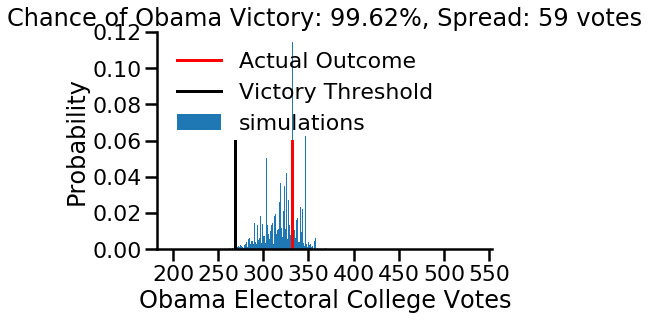

In [50]:
def plot_simulation(simulation):    
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()
with sns.plotting_context('poster'):
    plot_simulation(result)

This is an empirical **Probability Mass Function** or **Probability Density Function**. The concept of Mass Function is used when the outcomes come from a discrete set, rather than a continuous set. The word **density** is strictly used when the random variable X takes on continuous values, as in the uniform distribution, rather than discrete values such as here, but we'll abuse the language and use the word probability distribution in both cases.

Lets summarize: the way the density arose here that we did ran 10,000 tosses (for each state), and depending on the value, assigned the state to Obama or Romney, and then summed up the electoral votes over the states.

There is a second, very useful question, we can ask of any such probability density: what is the probability that a random variable is less than some value. In other words: $P(X < x)$. This is *also* a probability distribution and is called the **Cumulative Distribution Function**, or CDF (sometimes just called the **distribution**, as opposed to the **density**). Its obtained by "summing" the probability density function for all $X$ less than $x$.

In [0]:
CDF = lambda x: np.float(np.sum(result < x))/result.shape[0]
for votes in [200, 300, 320, 340, 360, 400, 500]:
    print("Obama Win CDF at votes=", votes, " is ", CDF(votes))

Obama Win CDF at votes= 200  is  0.0
Obama Win CDF at votes= 300  is  0.1445
Obama Win CDF at votes= 320  is  0.4484
Obama Win CDF at votes= 340  is  0.838
Obama Win CDF at votes= 360  is  0.9971
Obama Win CDF at votes= 400  is  1.0
Obama Win CDF at votes= 500  is  1.0


Text(0, 0.5, 'probability of Obama win')

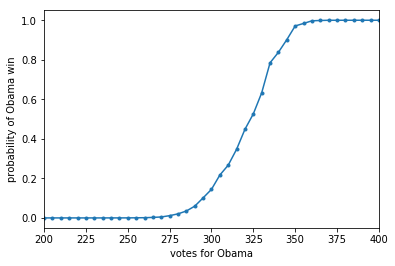

In [0]:
votelist=np.arange(0, 540, 5)
plt.plot(votelist, [CDF(v) for v in votelist], '.-');
plt.xlim([200,400])
plt.xlabel("votes for Obama")
plt.ylabel("probability of Obama win")

### The Gaussian Distribution

The sampling distribution of the mean itself has a mean $\mu$ and variance $s^2 = \frac{\sigma^2}{N}$. This distribution is called the **Gaussian** or **Normal Distribution**, and is probably the most important distribution in all of statistics.

The probability density of the normal distribution is given as:

$$ N(x, \mu, \sigma) = \frac{1}{s\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2s^2} } .$$

$s$ is called the **standard error**.

Lets step back and try and think about what this all means. As an example, say I have a weight-watchers' study of 1000 people, whose average weight is 150 lbs with standard deviation of 30lbs. If I was to randomly choose many samples of 100 people each, the mean weights of those samples would cluster around 150lbs with a standard error of 30/$\sqrt{100}$ = 3lbs. Now if i gave you a different sample of 100 people with an average weight of 170lbs, this weight would be more than 6 standard errors beyond the population mean, ^[this example is motivated by the crazy bus example in Charles Whelan's excellent Naked Statistics Book] and would thus be very unlikely to be from the weight watchers group.

The expected value of the Gaussian distribution is $E[X]=\mu$ and the variance is $Var[X]=s^2$.

Text(0.5, 0, '$x$')

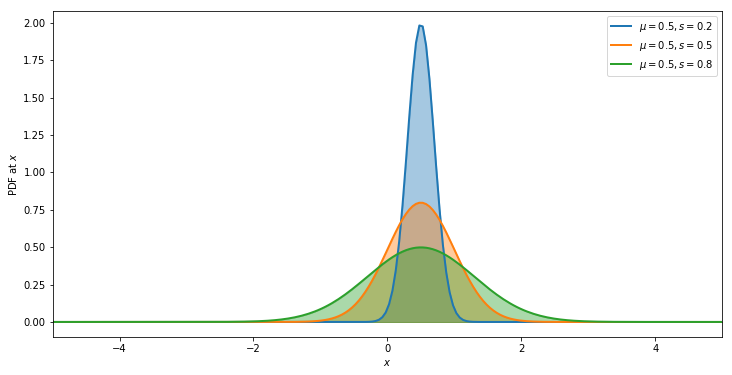

In [0]:
norm =  sp.stats.norm
x = np.linspace(-5,5, num=200)
colors=sns.color_palette()

fig = plt.figure(figsize=(12,6))
for mu, s, c in zip([0.5]*3, [0.2, 0.5, 0.8], colors):
    plt.plot(x, norm.pdf(x, mu, s), lw=2, 
             c=c, label = r"$\mu = {0:.1f}, s={1:.1f}$".format(mu, s))
    plt.fill_between(x, norm.pdf(x, mu, s), color=c, alpha = .4)
    
    
plt.xlim([-5,5])
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")

### The Central Limit Theorem

The reason for the distribution's importance is the Central Limit Theorem(CLT). The theorem is stated as thus, very similar to the law of large numbers:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables from a random variable $X$. Suppose that $X$ has the finite mean $\mu$ AND finite variance $\sigma^2$. Then the average of the first n of them:**

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to a Gaussian Random Variable with mean $\mu$ and variance $\sigma^2/n$ as $n \to \infty$:**

$$ S_n \sim N(\mu,\frac{\sigma^2}{n}) \, as \, n \to \infty. $$

In other words:

$$s^2 = \frac{\sigma^2}{N}.$$


This is true, *regardless* of the shape of $X$, which could be binomial, poisson, or any other distribution.

Strictly speaking, under some conditions ^[REF :Lyapunov conditions], the variables $x_i$ dont have to be identically distributed, as long as $\mu$ is the mean of the means and $\sigma^2$ is the sum of the individual variances. This has major consequences, for the importance of this theorem.

Many random variables can be thought of as having come from the sum of a large number of small and independent effects. For example human height or weight can be thought of as the sum as a large number of genetic and environmental factors, which add to increase or decrease height or weight respectively. Or think of a measurement of a height. There are lots of ways things could go wrong: frayed tapes, stretched tapes, smudged marks, bad lining up of the eye, etc. These are all independent and have no systematic error in one direction or the other.

Then the sum of these factors, as long as there are a large number of them, will be distributed as a gaussian.

As a rule of thumb, the CLT starts holding at $N \sim 30$.


#### An application to elections: Binomial distribution in the large n, large k limit

For example, consider the binomial distribution Binomial(n,k, p) in the limit of large n. The number of successes k in n trials can be ragarded as the sum of n IID Bernoulli variables with values 1 or 0. Obviously this is applicable to a large sequence of coin tosses, or to the binomial sampling issue that we encountered earlier in the case of the polling. 

Using the CLT we can replace the binomial distribution at large n by a gaussian where k is now a continuous variable, and whose mean is the mean of the binomial $np$ and whose variance is $np(1-p)$, since

$$S_n \sim N(p, \frac{p(1-p)}{n}).$$

The accuracy of this approximation depends on the variance. A large variance makes for a broad distribution spanning many discrete k, thus justifying the transition from a discrete to a continuous distribution.

This approximation is used a lot in studying elections. For example, suppose I told you that I'd polled 1000 people in Ohio and found that 600 would vote Democratic, and 400 republican. Imagine that this 1000 is a "sample" drawn from the voting "population" of Ohio. Assume then that these are 1000 independent bernoulli trials with p=600/1000 = 0.6. Then we can say that, from the CLT, the mean of the sampling distribution of the mean of the bernoulli or equivalently the binomial is 0.6, with a variance of $0.6*0.4/1000 = 0.00024$. Thus the standard deviation is 0.015 for a mean of 0.6, or 1.5% on a mean of 60% voting Democratic.  This 1.5% if part of what pollsters quote as the margin of error of a candidates winning; they often include other factors such as errors in polling methodology.

If one has results from multiple pollsters, one can treat them as independent samples from the voting population. Then the average from these samples will approach the average in the population, with the sample means distributed normally around it.

#### What does this all mean?

The sample mean, or mean of the random variables $x_{mi}$ in the sample $m$, has a sampling distribution with mean $\mu$ and variance $\frac{\sigma^2}{N}$, as shown before. Now for large sample sizes we can go further and use the CLT theorem to say that this distribution is the normal distribution,

$$S_N \sim N(\mu, \frac{\sigma^2}{N})$$.

The preciseness of saying that we have a gaussian is a huge gain in our expository power. For example, for the case of the weight-watchers program above, a separation of 20lbs is more than 3 standard errors away, which corresponds to being way in the tail of a gaussian distribution. Because we can now quantify the area under the curve, we can say that 99.7\% of the sample means lie within 9lbs of 150. Thus you can way easily reject the possibility that the new sample is from the weight-watchers program with 99.7\% confidence. 

Indeed, the CLT allows us to take the reduction in variance we get from large samples, and make statements in different cases that are quite strong:

1. if we know a lot about the population, and randomly sampled 100 points from it, the sample mean would be with 99.7\% confidence within $0.3\sigma$ of the population mean. And thus, if $\sigma$ is small, the sample mean is quite representative of the population mean.
2. The reverse: if we have a well sampled 100 data points, we could make strong statements about the population as a whole. This is indeed how election polling and other sampling works. 
3. we can infer, as we just did, if a sample is consistent with a population
4. by the same token, you can compare two samples and infer if they are from the same population.

### An application: Gallup Party Affiliation Poll

Earlier we had used the Predictwise probabilities from Octover 12th to create a predictive model for the elections. This time, armed with what we have learnt in this chapter, we will try to **estimate** our own win probabilities to plug into our predictive model.

We will start with a simple forecast model. We will try to predict the outcome of the election based the estimated proportion of people in each state who identify with one one political party or the other.

Gallup measures the political leaning of each state, based on asking random people which party they identify or affiliate with. [Here's the data](http://www.gallup.com/poll/156437/heavily-democratic-states-concentrated-east.aspx#2) they collected from January-June of 2012:

In [0]:
gallup_2012=pd.read_csv("data/g12.csv").set_index('State')
gallup_2012["Unknown"] = 100 - gallup_2012.Democrat - gallup_2012.Republican
gallup_2012.head()

,Democrat,Republican,Dem_Adv,N,Unknown
State,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4
Alaska,35.9,44.3,-8.4,402,19.8
Arizona,39.8,47.3,-7.5,4325,12.9
Arkansas,41.5,40.8,0.7,2071,17.7
California,48.3,34.6,13.7,16197,17.1


Each row lists a state, the percent of surveyed individuals who identify as Democrat/Republican, the percent whose identification is unknown or who haven't made an affiliation yet, the margin between Democrats and Republicans (`Dem_Adv`: the percentage identifying as Democrats minus the percentage identifying as Republicans), and the number `N` of people surveyed.

We can construct sub-dataframes by using an array-like indexing syntax

In [0]:
gallup_2012[['Dem_Adv', 'Unknown']].head()

,Dem_Adv,Unknown
State,,
Alabama,-13.6,14.4
Alaska,-8.4,19.8
Arizona,-7.5,12.9
Arkansas,0.7,17.7
California,13.7,17.1


The most obvious source of error in the Gallup data is the finite sample size -- Gallup did not poll *everybody* in America, and thus the party affilitions are subject to sampling errors. How much uncertainty does this introduce? Lets estimate the sampling error using what we learnt in the last section

In [0]:
gallup_2012["SE_percentage"]=100.0*np.sqrt((gallup_2012.Democrat/100.)*((100. - gallup_2012.Democrat)/100.)/(gallup_2012.N))
gallup_2012.head()

,Democrat,Republican,Dem_Adv,N,Unknown,SE_percentage
State,,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4,0.848926
Alaska,35.9,44.3,-8.4,402,19.8,2.392562
Arizona,39.8,47.3,-7.5,4325,12.9,0.744298
Arkansas,41.5,40.8,0.7,2071,17.7,1.082709
California,48.3,34.6,13.7,16197,17.1,0.392646


On their [webpage](http://www.gallup.com/poll/156437/heavily-democratic-states-concentrated-east.aspx#2) discussing these data, Gallup notes that the sampling error for the states is between 3 and 6%, with it being 3% for most states. This is more than what we find, so lets go with what Gallup says.

We now use Gallup's estimate of 3% to build a Gallup model with some uncertainty. We will, using the CLT, assume that the sampling distribution of the Obama win percentage is a gaussian with mean the democrat percentage and standard error the sampling error of 3\%. 

We'll build the model in the function `uncertain_gallup_model`, and return a forecast where the probability of an Obama victory is given by the probability that a sample from the `Dem_Adv` Gaussian is positive.

To do this we simply need to find the area under the curve of a Gaussian that is on the positive side of the x-axis.
The probability that a sample from a Gaussian with mean $\mu$ and standard deviation $\sigma$ exceeds a threhold $z$ can be found using $1$ minus the Cumulative Distribution Function, or the survival function of a Gaussian:

$$ SF(z) = 1 - CDF(z) $$

$$
1 - CDF(z) = \frac1{2}\left(1 + {\mathrm erf}\left(\frac{z - \mu}{\sqrt{2 \sigma^2}}\right)\right) 
$$

In [0]:
#from scipy.special import erf
def uncertain_gallup_model(gallup):
    sigma = 3
    #prob =  .5 * (1 + erf(gallup.Dem_Adv / np.sqrt(2 * sigma**2)))
    prob = norm.sf(0, gallup.Dem_Adv, sigma)
    return pd.DataFrame(dict(Obama=prob), index=gallup.index)

We now have two dataframes with state names as an index. Lets **join** these to produce a wider one with all the data we have. This is identical to a SQL inner join.

In [0]:
model = uncertain_gallup_model(gallup_2012)
model = model.join(electoral_votes)

In [0]:
model.head()

,Obama,Votes
State,,
Alabama,0.000003,9
Alaska,0.002555,3
Arizona,0.006210,11
Arkansas,0.592249,6
California,0.999998,55


You can make simple plots very easily with pandas:

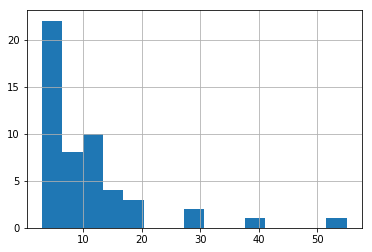

In [0]:
model.Votes.hist(bins=15);

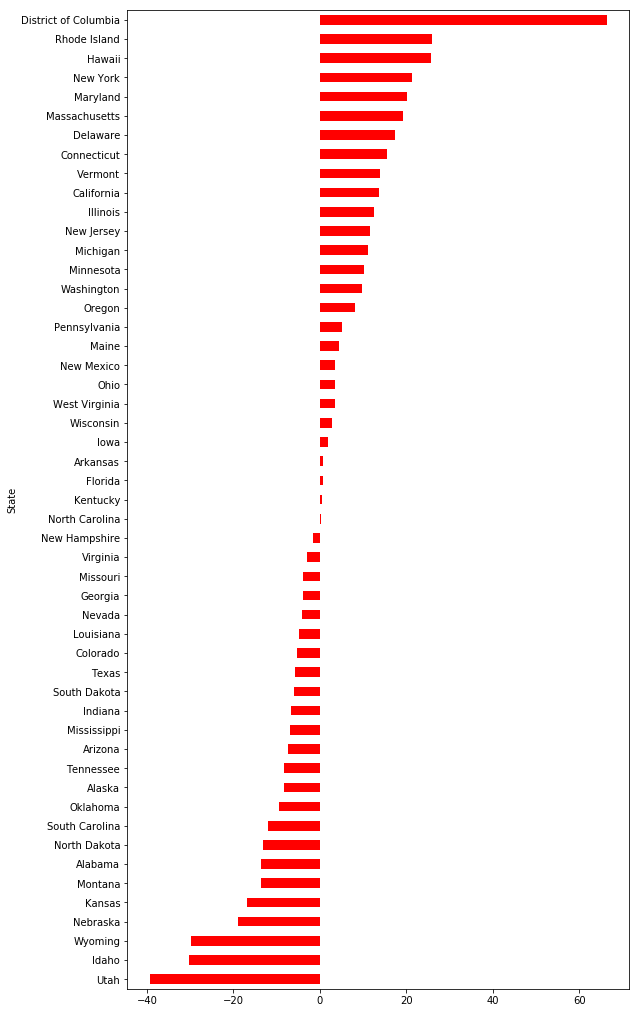

In [0]:
plt.figure(figsize=(9, 18))
gallup_2012.sort_values('Dem_Adv')['Dem_Adv'].plot(kind="barh", color="r");

What exactly is in a Pandas Series? Lets see:

In [0]:
votes_series = model.Votes
votes_series

State
Alabama                  9
Alaska                   3
Arizona                 11
Arkansas                 6
California              55
Colorado                 9
Connecticut              7
Delaware                 3
District of Columbia     3
Florida                 29
Georgia                 16
Hawaii                   4
Idaho                    4
Illinois                20
Indiana                 11
Iowa                     6
Kansas                   6
Kentucky                 8
Louisiana                8
Maine                    4
Maryland                10
Massachusetts           11
Michigan                16
Minnesota               10
Mississippi              6
Missouri                10
Montana                  3
Nebraska                 5
Nevada                   6
New Hampshire            4
New Jersey              14
New Mexico               5
New York                29
North Carolina          15
North Dakota             3
Ohio                    18
Oklahoma              

In [0]:
type(votes_series)

pandas.core.series.Series

We might want to get back to numpy:

In [0]:
votes_series.values

array([ 9,  3, 11,  6, 55,  9,  7,  3,  3, 29, 16,  4,  4, 20, 11,  6,  6,
        8,  8,  4, 10, 11, 16, 10,  6, 10,  3,  5,  6,  4, 14,  5, 29, 15,
        3, 18,  7,  7, 20,  4,  9,  3, 11, 38,  6,  3, 13, 12,  5, 10,  3])

In [0]:
model[['Obama', 'Votes']].values # get 2d

array([[2.90300406e-06, 9.00000000e+00],
       [2.55513033e-03, 3.00000000e+00],
       [6.20966533e-03, 1.10000000e+01],
       [5.92248712e-01, 6.00000000e+00],
       [9.99997522e-01, 5.50000000e+01],
       [4.15182197e-02, 9.00000000e+00],
       [9.99999858e-01, 7.00000000e+00],
       [9.99999997e-01, 3.00000000e+00],
       [1.00000000e+00, 3.00000000e+00],
       [5.92248712e-01, 2.90000000e+01],
       [9.12112197e-02, 1.60000000e+01],
       [1.00000000e+00, 4.00000000e+00],
       [2.76210947e-24, 4.00000000e+00],
       [9.99986654e-01, 2.00000000e+01],
       [1.27634855e-02, 1.10000000e+01],
       [7.25746882e-01, 6.00000000e+00],
       [8.83796687e-09, 6.00000000e+00],
       [5.53035117e-01, 8.00000000e+00],
       [5.47992917e-02, 8.00000000e+00],
       [9.28766623e-01, 4.00000000e+00],
       [1.00000000e+00, 1.00000000e+01],
       [1.00000000e+00, 1.10000000e+01],
       [9.99892200e-01, 1.60000000e+01],
       [9.99663071e-01, 1.00000000e+01],
       [9.815328

## Simulate!

We plot a map of these probabilities as before, run the simulation, and display the results

In [0]:
prediction = simulate_election(model, 10000)
prediction

array([326, 333, 329, ..., 320, 294, 313])

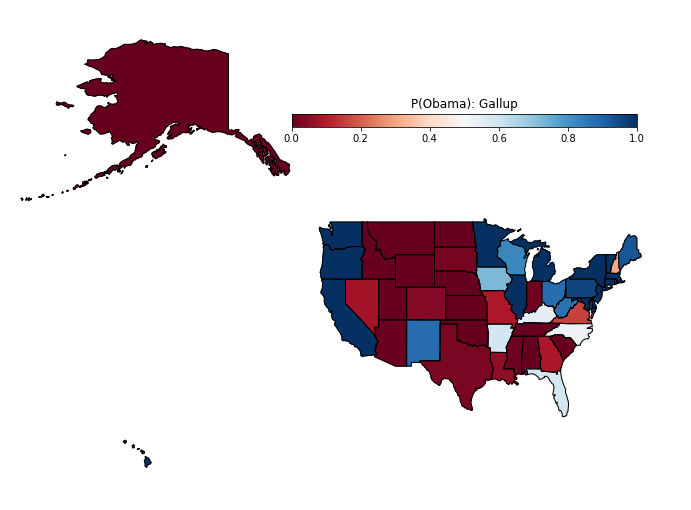

In [0]:
from statesplot import make_map, load_states_geom
s2p = load_states_geom("data/us-states.json")
make_map(s2p, model.Obama, "P(Obama): Gallup");

In [0]:
def plot_simulation(simulation):    
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()

//anaconda/envs/py3l/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


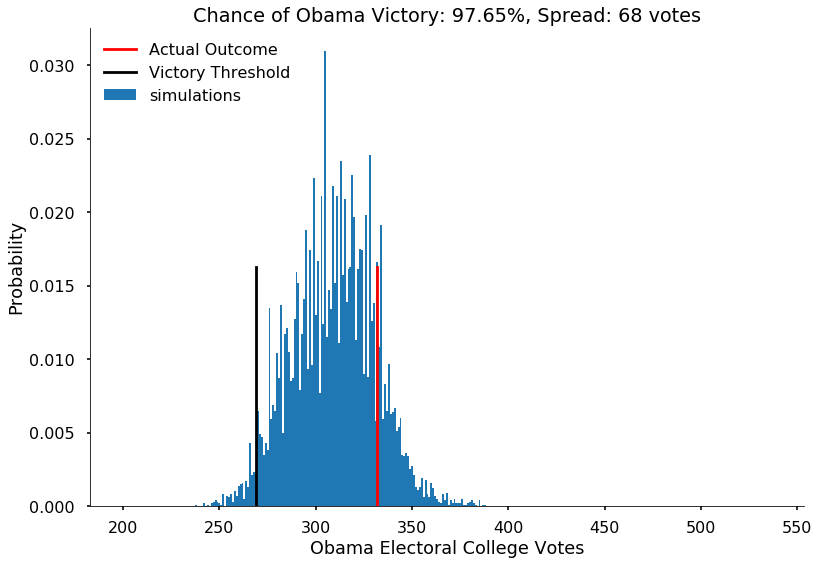

In [0]:
with sns.plotting_context('poster'):
    plot_simulation(prediction)

The predictive distribution is consistent with the real data -- the real outcome seems like a typical outcome according to the model. The accuracy is not very good as the center of the distribution falls fairly far from the observed outcome, but the precision is only marginally worse than in the predictwise case.

But note that we used the Gallup voter self-identification from January to June to predict this, so we do not expect to do too well. And even though this is probably not a very unbiased sample, it still makes us wonder: at 97\% of simulations showing a win for Obama, why did Romney ever think he had a chance?